# Design Choices Experiments

## Cartpole-v1 ELBE

### Reward Curve

In [124]:
import pandas as pd
import os
import pandas as pd

df = pd.read_csv('./data_2/samples_exp_1.csv')

# Function to calculate mean reward from a CSV file
def calculate_mean_reward(file_path):
    if os.path.exists(file_path):
        rewards_df = pd.read_csv(file_path)
        mean_reward = rewards_df['Reward'].mean()  # assuming 'reward' is the column name in the CSV
        return mean_reward
    else:
        return 40

# Create a new column in the dataframe for mean rewards
df['mean_reward'] = df['index'].apply(lambda index: calculate_mean_reward(os.path.join('data', f'rewards_random_elbe_cartpole_{index}.csv')))


best_runs = df.sort_values(by='mean_reward', ascending=False)
best_runs.head()  # display the first few rows of the updated dataframe
best_runs = best_runs[best_runs['mean_reward']>=0]
best_runs['name'] = 'Overall mean'

# Calculate the 5th quantile of mean_reward
top_1 = best_runs['mean_reward'].quantile(0.99)
quantile_1_runs = best_runs[best_runs['mean_reward'] <= top_1]
quantile_1_runs['name'] = 'Top 1% mean'

# Calculate the 95th quantile of mean_reward
top_5 = best_runs['mean_reward'].quantile(0.95)
quantile_5_runs = best_runs[best_runs['mean_reward'] >= top_5]
quantile_5_runs['name'] = 'Top 5% mean'

# Calculate the 50th quantile of mean_reward
quantile_10 = best_runs['mean_reward'].quantile(0.9)
quantile_10_runs = best_runs[best_runs['mean_reward'] <= quantile_10]
quantile_10_runs['name'] = 'Top 10% mean'


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/628553753.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_1_runs['name'] = 'Top 1% mean'
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/628553753.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_5_runs['name'] = 'Top 5% mean'
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/628553753.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

File not found: data/rewards_random_elbe_cartpole_354.csv
File not found: data/rewards_random_elbe_cartpole_25.csv
File not found: data/rewards_random_elbe_cartpole_707.csv
File not found: data/rewards_random_elbe_cartpole_125.csv
File not found: data/rewards_random_elbe_cartpole_220.csv
File not found: data/rewards_random_elbe_cartpole_929.csv
File not found: data/rewards_random_elbe_cartpole_209.csv
File not found: data/rewards_random_elbe_cartpole_781.csv
File not found: data/rewards_random_elbe_cartpole_354.csv
File not found: data/rewards_random_elbe_cartpole_25.csv
File not found: data/rewards_random_elbe_cartpole_707.csv
File not found: data/rewards_random_elbe_cartpole_125.csv
File not found: data/rewards_random_elbe_cartpole_220.csv
File not found: data/rewards_random_elbe_cartpole_929.csv
File not found: data/rewards_random_elbe_cartpole_209.csv
File not found: data/rewards_random_elbe_cartpole_781.csv
File not found: data/rewards_random_elbe_cartpole_354.csv
File not found: 

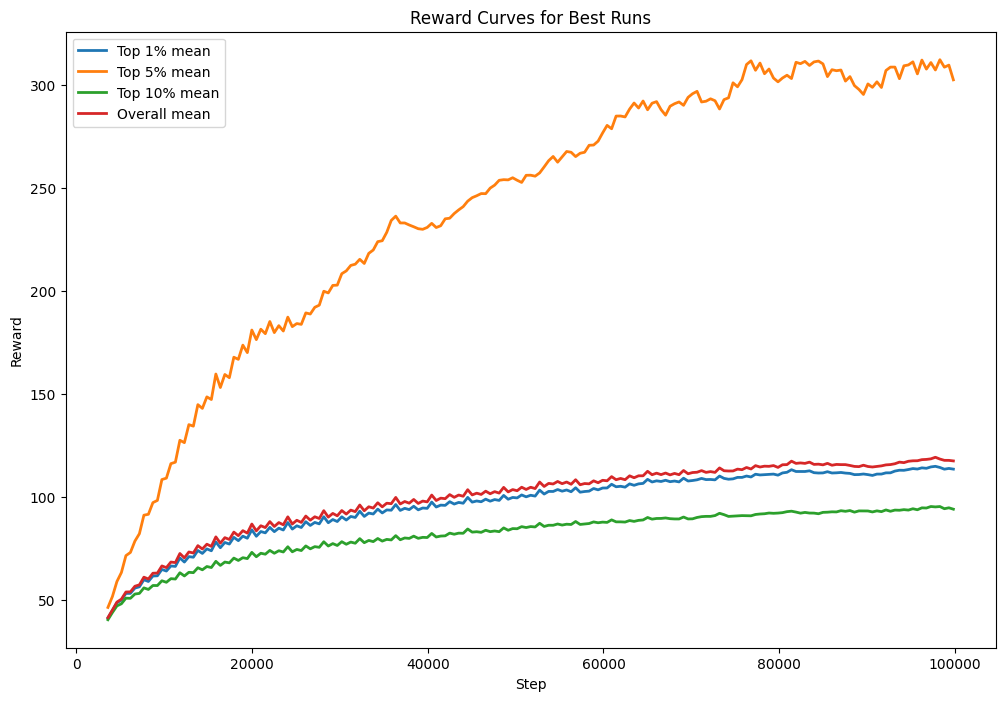

In [126]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# List of DataFrames containing the top runs
dfs = [quantile_1_runs, quantile_5_runs, quantile_10_runs, best_runs]

# Initialize the plot
plt.figure(figsize=(12, 8))

# Iterate through each DataFrame in dfs
for top in dfs:
    rewards = []
    for index, row in top.iterrows():
        path = os.path.join('data', f'rewards_random_elbe_cartpole_{row["index"]}.csv')
        if not os.path.exists(path):
            print(f"File not found: {path}")
            continue
        rewards_df = pd.read_csv(path)
        rewards.append(rewards_df)

    # Combine all interpolated DataFrames
    combined_df = pd.concat(rewards)

    # Calculate the average reward grouped by 'Step'
    average_reward = combined_df.groupby('Step')['Reward'].mean()
    rolling_average = average_reward.rolling(window=7).mean()

    # plt.plot(average_reward.index, average_reward, label=f'Average Reward - x', alpha=0.7)
    plt.plot(rolling_average.index, rolling_average, label=f'{top.name.values[0]}', linewidth=2)

# Add plot details
plt.xlabel('Step')
plt.ylabel('Reward')
plt.title('Reward Curves for Best Runs')
plt.legend()
plt.show()



### Frequency of parameter choices in top 5% configurations

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/297304765.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=top_10[parameter], order=top_10[parameter].value_counts().index, palette='viridis', stat='proportion')


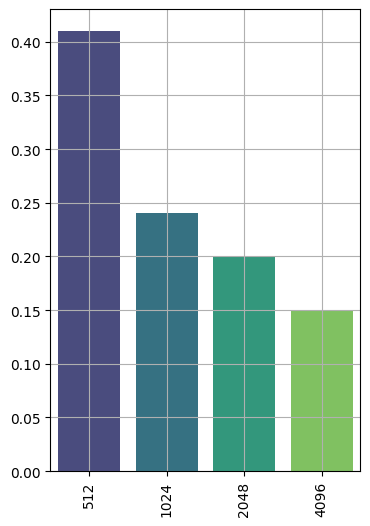

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/297304765.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=top_10[parameter], order=top_10[parameter].value_counts().index, palette='viridis', stat='proportion')


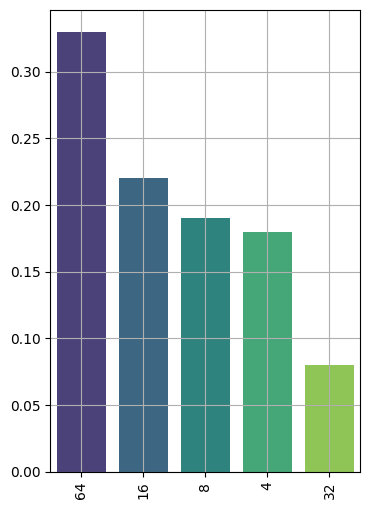

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/297304765.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=top_10[parameter], order=top_10[parameter].value_counts().index, palette='viridis', stat='proportion')


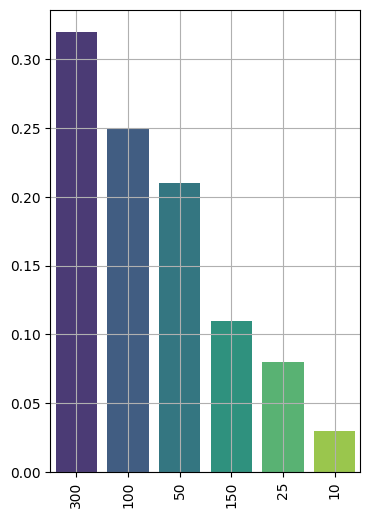

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/297304765.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=top_10[parameter], order=top_10[parameter].value_counts().index, palette='viridis', stat='proportion')


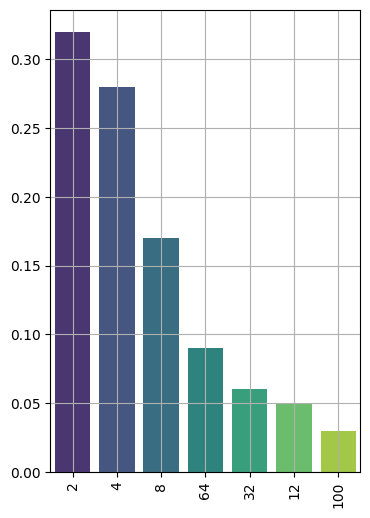

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/297304765.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=top_10[parameter], order=top_10[parameter].value_counts().index, palette='viridis', stat='proportion')


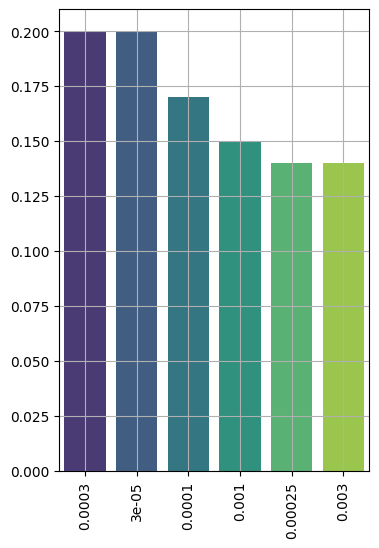

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/297304765.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=top_10[parameter], order=top_10[parameter].value_counts().index, palette='viridis', stat='proportion')


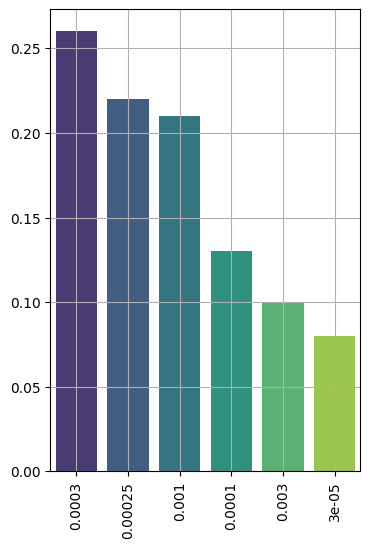

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/297304765.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=top_10[parameter], order=top_10[parameter].value_counts().index, palette='viridis', stat='proportion')


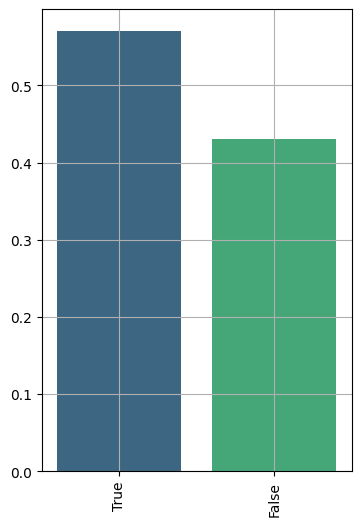

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/297304765.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=top_10[parameter], order=top_10[parameter].value_counts().index, palette='viridis', stat='proportion')


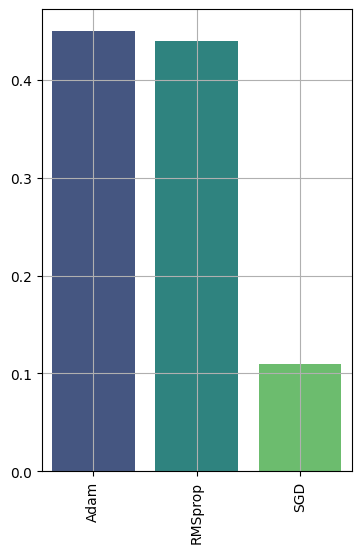

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/297304765.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=top_10[parameter], order=top_10[parameter].value_counts().index, palette='viridis', stat='proportion')


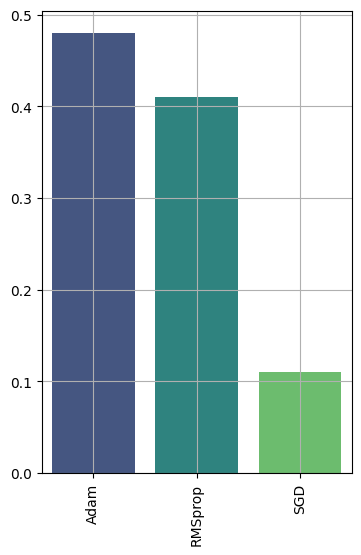

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/297304765.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=top_10[parameter], order=top_10[parameter].value_counts().index, palette='viridis', stat='proportion')


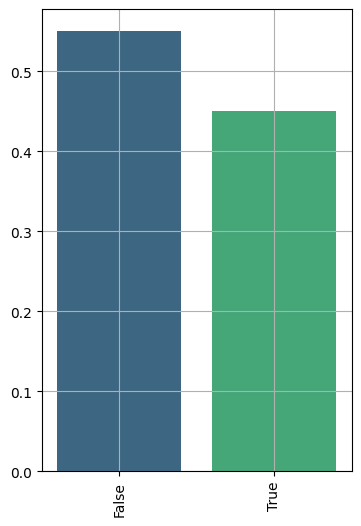

In [142]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./data_2/samples_exp_1.csv')

top_10 = best_runs.head(100)

parameters = ['total_iterations', 'num_minibatches', 'update_epochs', 
             'alpha', 'policy_lr', 'q_lr', 'anneal_lr', 'q_optimizer', 
             'actor_optimizer', 'average_critics']


# Plot the frequency of each parameter choice within the top 5% configurations
for parameter in parameters:
    plt.figure(figsize=(4, 6))
    sns.countplot(x=top_10[parameter], order=top_10[parameter].value_counts().index, palette='viridis', stat='proportion')
    plt.ylabel(f'')
    plt.xlabel(f'')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()


### Parameter Choices Distribution

File not found: ./data/rewards_random_elbe_cartpole_125.csv
File not found: ./data/rewards_random_elbe_cartpole_25.csv
File not found: ./data/rewards_random_elbe_cartpole_209.csv
File not found: ./data/rewards_random_elbe_cartpole_220.csv
File not found: ./data/rewards_random_elbe_cartpole_354.csv
File not found: ./data/rewards_random_elbe_cartpole_707.csv
File not found: ./data/rewards_random_elbe_cartpole_781.csv
File not found: ./data/rewards_random_elbe_cartpole_929.csv


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s

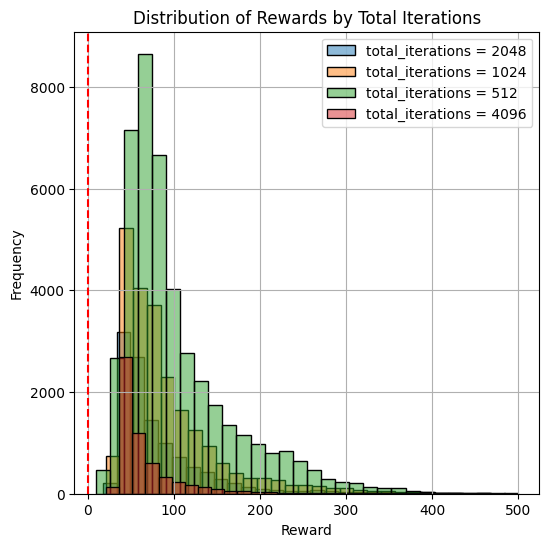

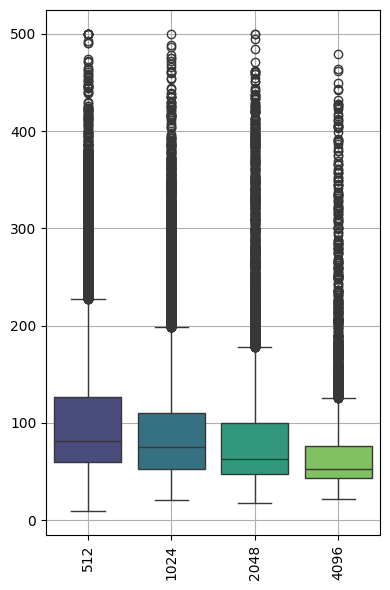

File not found: ./data/rewards_random_elbe_cartpole_25.csv
File not found: ./data/rewards_random_elbe_cartpole_125.csv
File not found: ./data/rewards_random_elbe_cartpole_209.csv
File not found: ./data/rewards_random_elbe_cartpole_220.csv
File not found: ./data/rewards_random_elbe_cartpole_354.csv
File not found: ./data/rewards_random_elbe_cartpole_707.csv
File not found: ./data/rewards_random_elbe_cartpole_781.csv
File not found: ./data/rewards_random_elbe_cartpole_929.csv


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s

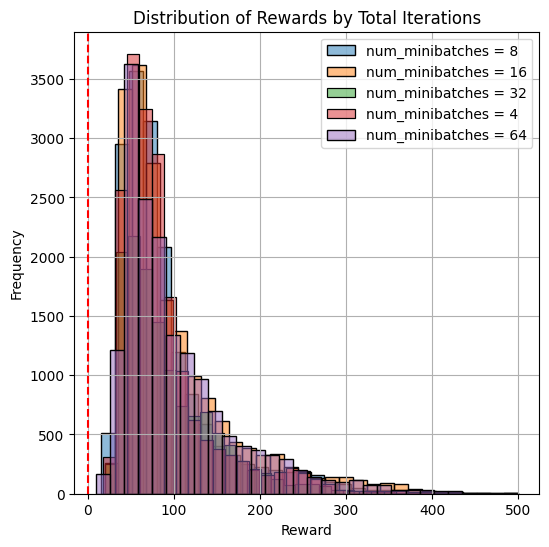

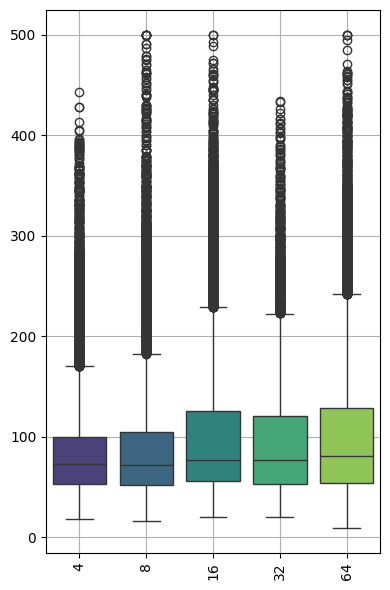

File not found: ./data/rewards_random_elbe_cartpole_25.csv
File not found: ./data/rewards_random_elbe_cartpole_125.csv
File not found: ./data/rewards_random_elbe_cartpole_209.csv
File not found: ./data/rewards_random_elbe_cartpole_220.csv
File not found: ./data/rewards_random_elbe_cartpole_354.csv
File not found: ./data/rewards_random_elbe_cartpole_707.csv
File not found: ./data/rewards_random_elbe_cartpole_781.csv
File not found: ./data/rewards_random_elbe_cartpole_929.csv


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s

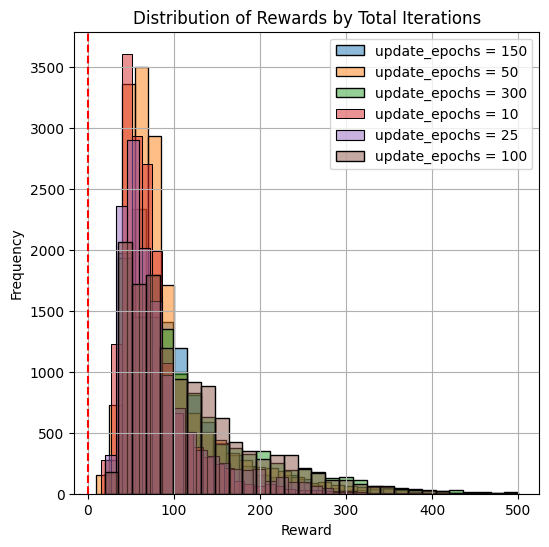

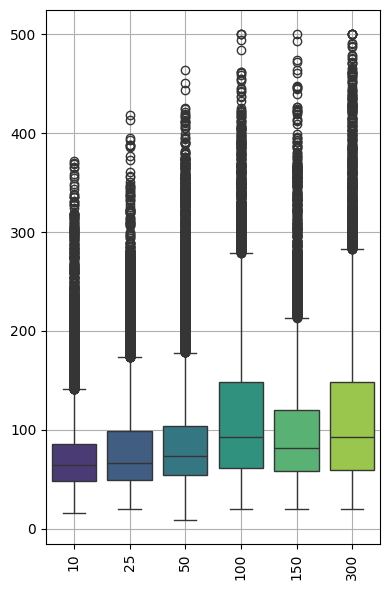

File not found: ./data/rewards_random_elbe_cartpole_125.csv
File not found: ./data/rewards_random_elbe_cartpole_209.csv
File not found: ./data/rewards_random_elbe_cartpole_354.csv
File not found: ./data/rewards_random_elbe_cartpole_707.csv
File not found: ./data/rewards_random_elbe_cartpole_220.csv
File not found: ./data/rewards_random_elbe_cartpole_781.csv
File not found: ./data/rewards_random_elbe_cartpole_25.csv
File not found: ./data/rewards_random_elbe_cartpole_929.csv


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s

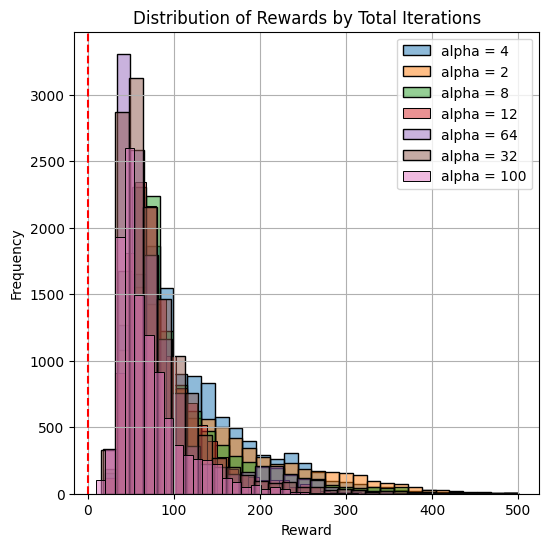

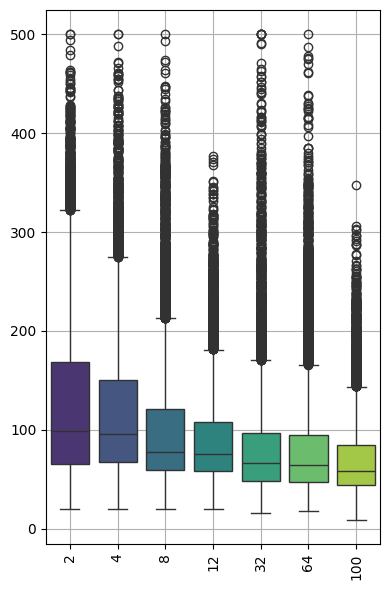

File not found: ./data/rewards_random_elbe_cartpole_125.csv
File not found: ./data/rewards_random_elbe_cartpole_220.csv
File not found: ./data/rewards_random_elbe_cartpole_209.csv
File not found: ./data/rewards_random_elbe_cartpole_354.csv
File not found: ./data/rewards_random_elbe_cartpole_929.csv
File not found: ./data/rewards_random_elbe_cartpole_25.csv
File not found: ./data/rewards_random_elbe_cartpole_781.csv
File not found: ./data/rewards_random_elbe_cartpole_707.csv


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s

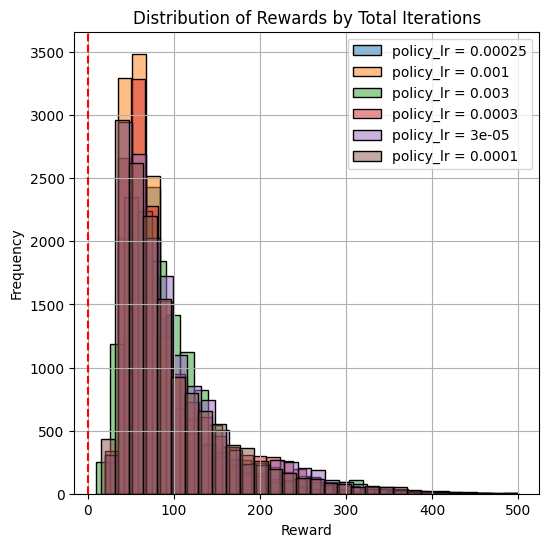

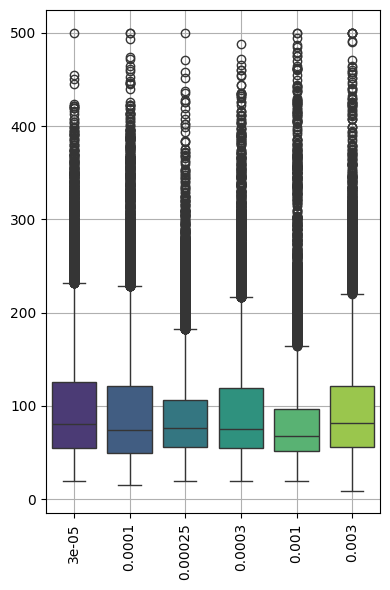

File not found: ./data/rewards_random_elbe_cartpole_125.csv
File not found: ./data/rewards_random_elbe_cartpole_209.csv
File not found: ./data/rewards_random_elbe_cartpole_220.csv
File not found: ./data/rewards_random_elbe_cartpole_707.csv
File not found: ./data/rewards_random_elbe_cartpole_929.csv
File not found: ./data/rewards_random_elbe_cartpole_25.csv
File not found: ./data/rewards_random_elbe_cartpole_354.csv
File not found: ./data/rewards_random_elbe_cartpole_781.csv


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s

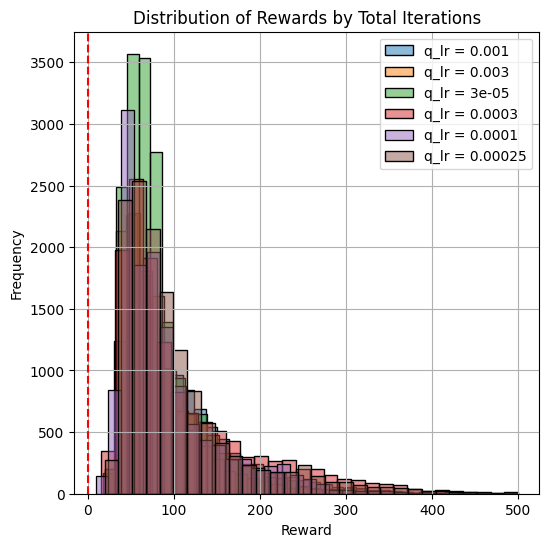

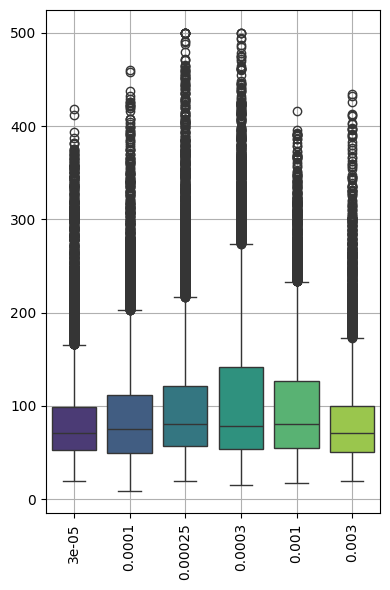

File not found: ./data/rewards_random_elbe_cartpole_25.csv
File not found: ./data/rewards_random_elbe_cartpole_354.csv
File not found: ./data/rewards_random_elbe_cartpole_707.csv
File not found: ./data/rewards_random_elbe_cartpole_929.csv
File not found: ./data/rewards_random_elbe_cartpole_125.csv
File not found: ./data/rewards_random_elbe_cartpole_209.csv
File not found: ./data/rewards_random_elbe_cartpole_220.csv
File not found: ./data/rewards_random_elbe_cartpole_781.csv


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')


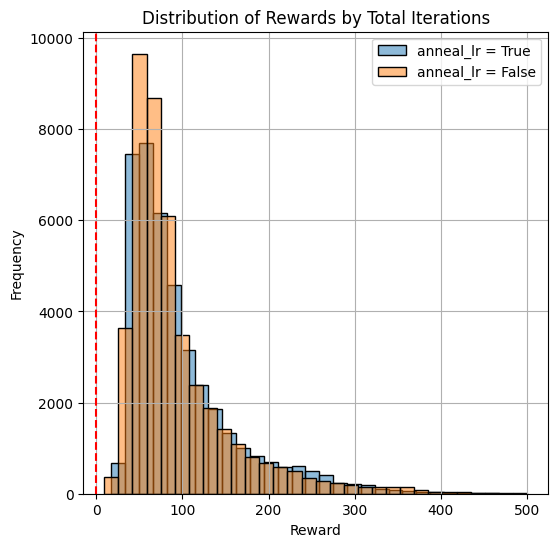

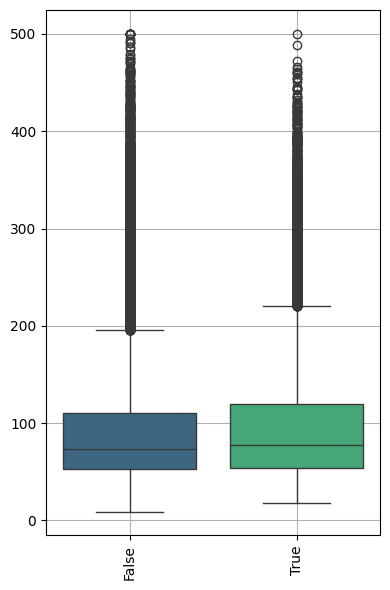

File not found: ./data/rewards_random_elbe_cartpole_781.csv
File not found: ./data/rewards_random_elbe_cartpole_354.csv
File not found: ./data/rewards_random_elbe_cartpole_25.csv
File not found: ./data/rewards_random_elbe_cartpole_125.csv
File not found: ./data/rewards_random_elbe_cartpole_209.csv
File not found: ./data/rewards_random_elbe_cartpole_220.csv
File not found: ./data/rewards_random_elbe_cartpole_707.csv
File not found: ./data/rewards_random_elbe_cartpole_929.csv


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')


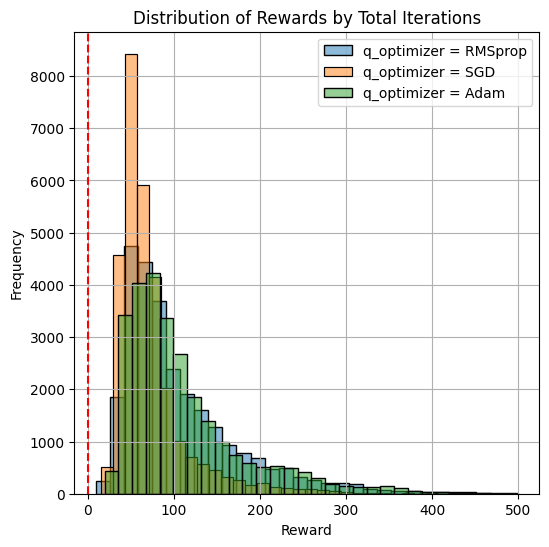

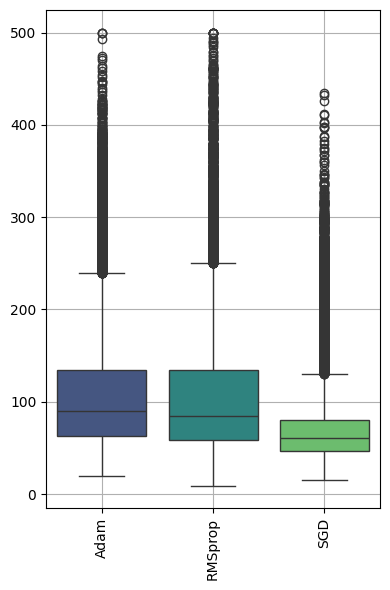

File not found: ./data/rewards_random_elbe_cartpole_25.csv
File not found: ./data/rewards_random_elbe_cartpole_125.csv
File not found: ./data/rewards_random_elbe_cartpole_209.csv
File not found: ./data/rewards_random_elbe_cartpole_220.csv
File not found: ./data/rewards_random_elbe_cartpole_929.csv
File not found: ./data/rewards_random_elbe_cartpole_354.csv
File not found: ./data/rewards_random_elbe_cartpole_707.csv
File not found: ./data/rewards_random_elbe_cartpole_781.csv


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')


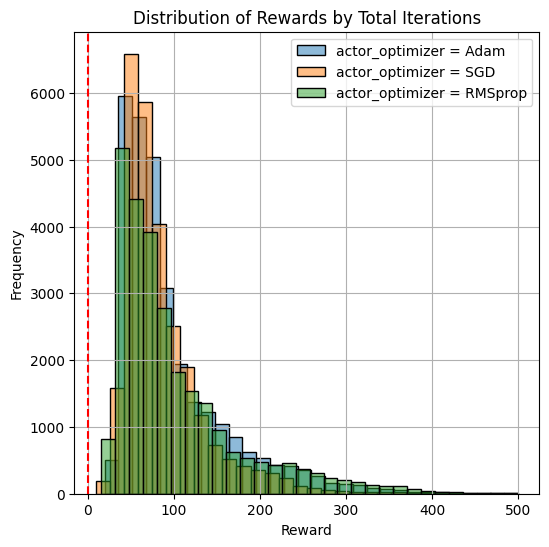

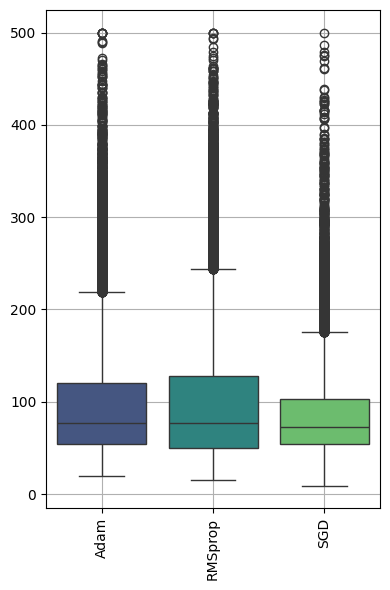

File not found: ./data/rewards_random_elbe_cartpole_125.csv
File not found: ./data/rewards_random_elbe_cartpole_220.csv
File not found: ./data/rewards_random_elbe_cartpole_25.csv
File not found: ./data/rewards_random_elbe_cartpole_209.csv
File not found: ./data/rewards_random_elbe_cartpole_354.csv
File not found: ./data/rewards_random_elbe_cartpole_707.csv
File not found: ./data/rewards_random_elbe_cartpole_781.csv
File not found: ./data/rewards_random_elbe_cartpole_929.csv


/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')
/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/4169522930.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')


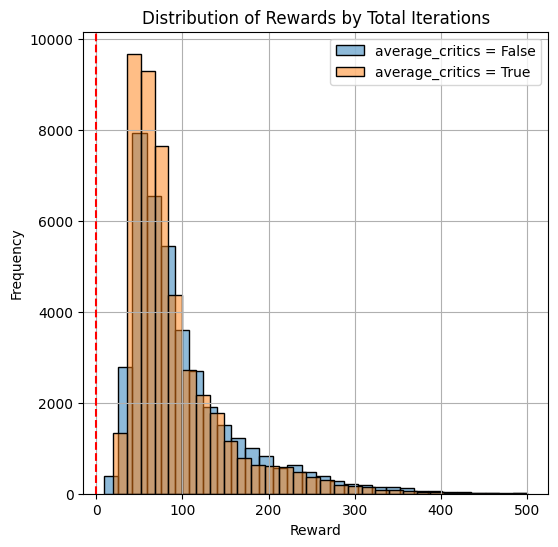

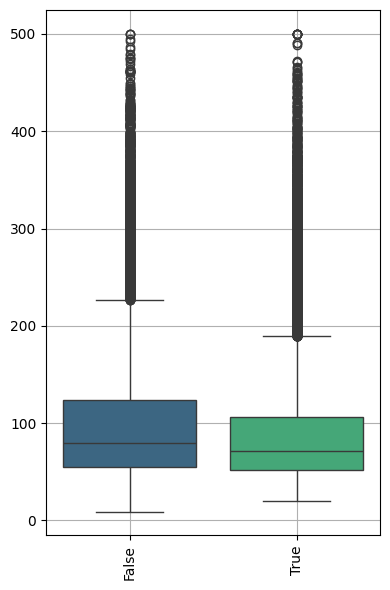

In [151]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./data_2/samples_exp_1.csv')

parameters = ['total_iterations', 'num_minibatches', 'update_epochs', 
             'alpha', 'policy_lr', 'q_lr', 'anneal_lr', 'q_optimizer', 
             'actor_optimizer', 'average_critics']

for parameter in parameters:
    parameter_values = df[parameter].unique()

    all_reward_distributions = []

    for idx, value in enumerate(parameter_values):
        subset_df = df[df[parameter] == value]
        
        reward_distributions = []
        
        for index, row in subset_df.iterrows():
            csv_path = f'./data/rewards_random_elbe_cartpole_{index+1}.csv'
            if os.path.exists(csv_path):
                rewards = pd.read_csv(csv_path)
                rewards = rewards[rewards['Reward']>=0]
                # if rewards['Reward'].all() > 0:
                reward_distributions.append(rewards['Reward'].values.flatten())
            else:
                print(f"File not found: {csv_path}")

        reward_distributions = [item for sublist in reward_distributions for item in sublist]
        
        all_reward_distributions.append(reward_distributions)

    plt.figure(figsize=(6, 6))

    for idx, dist in enumerate(all_reward_distributions):
        sns.histplot(dist, bins=30, kde=False, label=f'{parameter} = {parameter_values[idx]}', alpha=0.5, palette='viridis')

    plt.xlabel('Reward')
    plt.ylabel('Frequency')
    plt.title('Distribution of Rewards by Total Iterations')
    plt.legend()
    plt.grid(True)
    plt.axvline(x=0, color='r', linestyle='--')  # Add a vertical line at zero
    plt.show()


    combined = list(zip(parameter_values, all_reward_distributions))
    combined.sort(key=lambda x: x[0])
    parameter_values_sorted, all_reward_distributions_sorted = zip(*combined)

    plt.figure(figsize=(4, 6))  # Increase the width to better accommodate vertical labels
    sns.boxplot(data=all_reward_distributions_sorted, palette='viridis')
    plt.xlabel(f'')
    plt.ylabel('')
    plt.title(f'')
    plt.xticks(range(len(parameter_values_sorted)), parameter_values_sorted, rotation=90)
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for x-axis labels
    plt.show()

# Episodic return Comparison

/var/folders/rz/cwn_bhpd7x9bm5nv218wrcx80000gn/T/ipykernel_28793/2027050491.py:72: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(left=0.06, right=0.85, top=0.9, bottom=0.1)


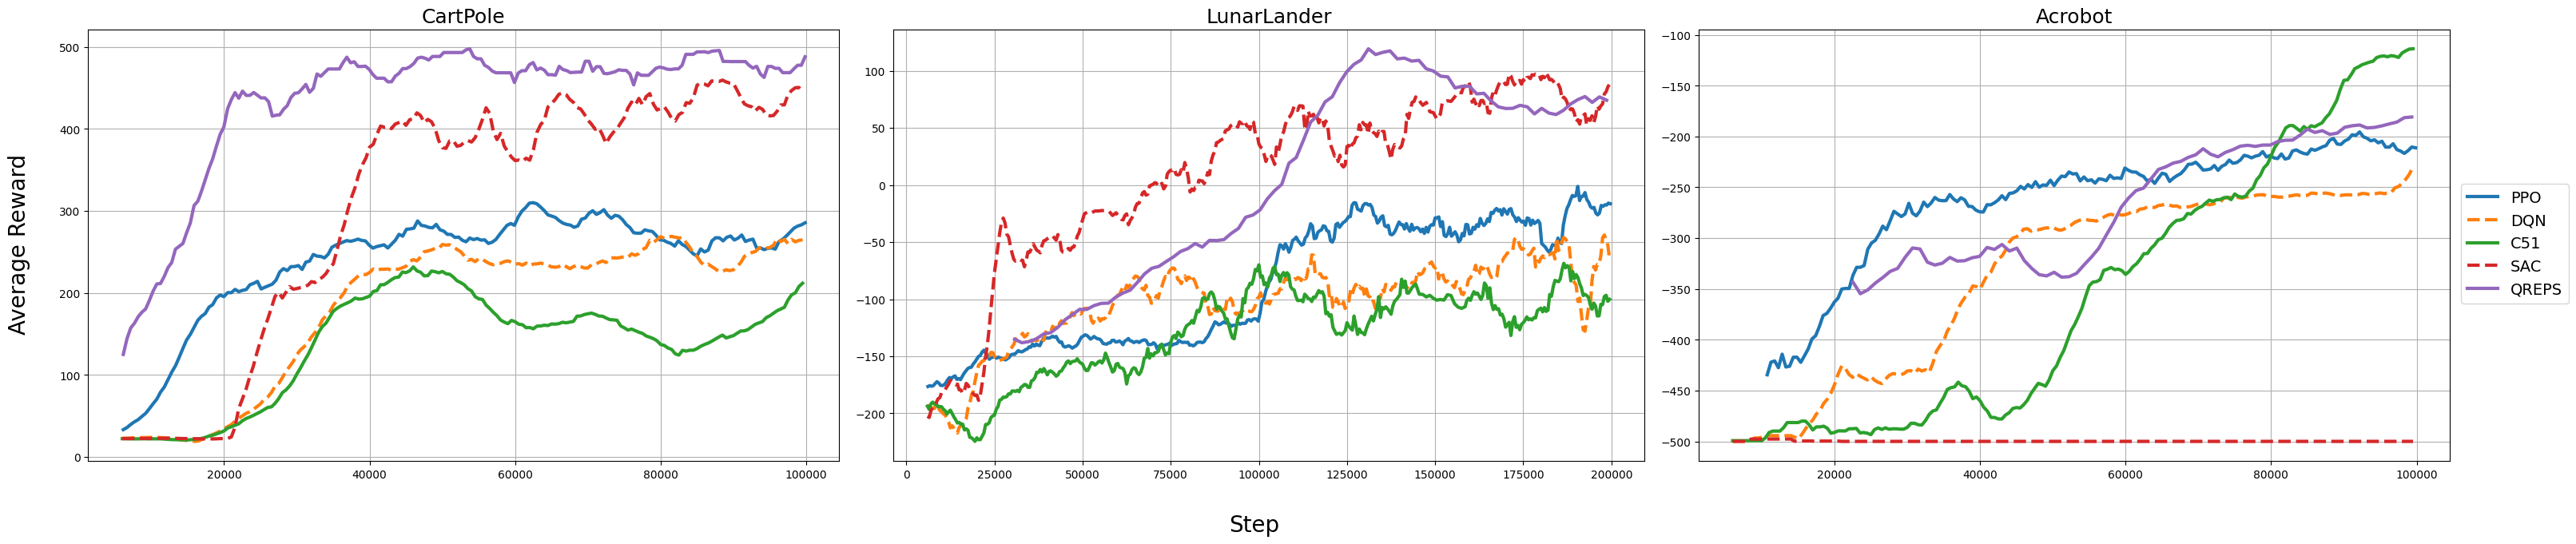

In [170]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define current directory
current_dir = os.getcwd()

# Load data for CartPole
ppo_cartpole = pd.read_csv(current_dir + '/runs_benchmark/average_reward_ppo.csv')
dqn_cartpole = pd.read_csv(current_dir + '/runs_benchmark/average_reward_dqn.csv')
c51_cartpole = pd.read_csv(current_dir + '/runs_benchmark/average_reward_c51.csv')
sac_cartpole = pd.read_csv(current_dir + '/runs_benchmark/average_reward_sac.csv')
qreps_cartpole = pd.read_csv(current_dir + '/runs_benchmark/rewards_cartpole_705.csv')

# Load data for LunarLander
ppo_lunar = pd.read_csv(current_dir + '/runs_benchmark/average_reward_ppo_LunarLander.csv')
dqn_lunar = pd.read_csv(current_dir + '/runs_benchmark/average_reward_dqn_LunarLander.csv')
c51_lunar = pd.read_csv(current_dir + '/runs_benchmark/average_reward_c51_LunarLander.csv')
sac_lunar = pd.read_csv(current_dir + '/runs_benchmark/average_reward_sac_LunarLander.csv')
qreps_lunar = pd.read_csv(current_dir + '/runs_benchmark/rewards_lunar_2eafd1b1.csv')

# Load data for Acrobot
ppo_acrobot = pd.read_csv(current_dir + '/runs_benchmark/average_reward_ppo_Acrobot.csv')
dqn_acrobot = pd.read_csv(current_dir + '/runs_benchmark/average_reward_dqn_Acrobot.csv')
c51_acrobot = pd.read_csv(current_dir + '/runs_benchmark/average_reward_c51_Acrobot.csv')
sac_acrobot = pd.read_csv(current_dir + '/runs_benchmark/average_reward_sac_Acrobot.csv')
qreps_acrobot = pd.read_csv(current_dir + '/runs_benchmark/rewards_acrobot_453c3cdf.csv')

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 6), constrained_layout=True)

# Plot 1: CartPole
window_size = 12
for data, label, linestyle in zip([ppo_cartpole, dqn_cartpole, c51_cartpole, sac_cartpole, qreps_cartpole], 
                                  ['PPO', 'DQN', 'C51', 'SAC', 'QREPS'], 
                                  ['-', '--', '-', '--', '-']):
    smoothed_reward = data['Reward'].rolling(window=window_size).mean()
    axs[0].plot(data['Step'], smoothed_reward, label=label, linestyle=linestyle, linewidth=3)

axs[0].set_title('CartPole', fontsize=18)
axs[0].grid(True)

# Plot 2: LunarLander
for data, label, linestyle in zip([ppo_lunar, dqn_lunar, c51_lunar, sac_lunar, qreps_lunar], 
                                  ['PPO', 'DQN', 'C51', 'SAC', 'QREPS'], 
                                  ['-', '--', '-', '--', '-']):
    smoothed_reward = data['Reward'].rolling(window=window_size).mean()
    axs[1].plot(data['Step'], smoothed_reward, label=label, linestyle=linestyle, linewidth=3)

axs[1].set_title('LunarLander', fontsize=18)
axs[1].grid(True)

# Plot 3: Acrobot
for data, label, linestyle in zip([ppo_acrobot, dqn_acrobot, c51_acrobot, sac_acrobot, qreps_acrobot], 
                                  ['PPO', 'DQN', 'C51', 'SAC', 'QREPS'], 
                                  ['-', '--', '-', '--', '-']):
    smoothed_reward = data['Reward'].rolling(window=window_size).mean()
    axs[2].plot(data['Step'], smoothed_reward, label=label, linestyle=linestyle, linewidth=3)

axs[2].set_title('Acrobot', fontsize=18)
axs[2].grid(True)

# Add a single set of axis labels
fig.text(0.5, -0.1, 'Step', ha='center', fontsize=20)
fig.text(-0.02, 0.5, 'Average Reward', va='center', rotation='vertical', fontsize=20)

# Add a legend outside the subplots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)

# Adjust layout to make room for the legend
plt.subplots_adjust(left=0.06, right=0.85, top=0.9, bottom=0.1)
plt.show()



## Extra

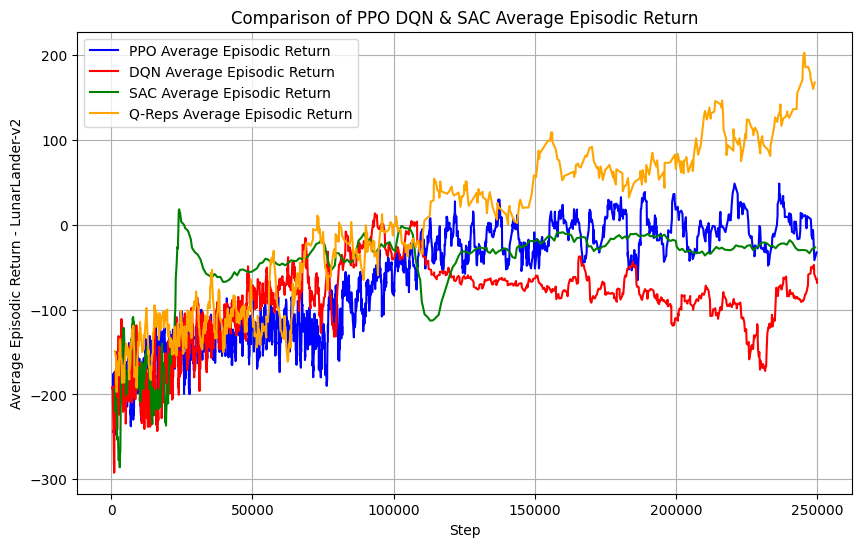

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Directories for PPO and DQN data
ppo_dir = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/ppo_runs/lunarlander'
dqn_dir = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/dqn_runs/lunarlander'
sac_dir = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/sac_runs/lunarlander'
qreps_dir = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/qreps_runs/lunarlander'

# Function to load CSV files into a DataFrame
def load_data(directory):
    all_data = []
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            all_data.append(df)
    return pd.concat(all_data, ignore_index=True)

# Load data into DataFrames
ppo_df = load_data(ppo_dir)
dqn_df = load_data(dqn_dir)
sac_df = load_data(sac_dir)
qreps_df = load_data(qreps_dir)

# Calculate average and standard deviation for PPO
ppo_avg_return = ppo_df.groupby('Step')['Reward'].mean().rolling(window=13).mean()
dqn_avg_return = dqn_df.groupby('Step')['Reward'].mean().rolling(window=13).mean()
sac_avg_return = sac_df.groupby('Step')['Reward'].mean().rolling(window=13).mean()
qreps_avg_return = qreps_df.groupby('Step')['Reward'].mean().rolling(window=13).mean()

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(ppo_avg_return.index, ppo_avg_return.values, label='PPO Average Episodic Return', color='blue')
plt.plot(dqn_avg_return.index, dqn_avg_return.values, label='DQN Average Episodic Return', color='red')
plt.plot(sac_avg_return.index, sac_avg_return.values, label='SAC Average Episodic Return', color='green')
plt.plot(qreps_avg_return.index, qreps_avg_return.values, label='Q-Reps Average Episodic Return', color='orange')

plt.xlabel('Step')
plt.ylabel('Average Episodic Return - LunarLander-v2')
plt.title('Comparison of PPO DQN & SAC Average Episodic Return')
plt.legend()
plt.grid(True)
plt.show()